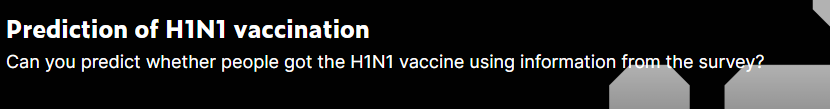

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.core.indexes.multi import duplicated

# 1. **Data Exploration** **and Preparation**

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")
df.head

<bound method NDFrame.head of        unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
2              2         1.0             1.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26704      26704         2.0             2.0                   0.0   
26705      26705         1.0             1.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0                  

In [ ]:
df.shape

(26707, 34)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
df.isnull().sum ()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [ ]:
df.T.duplicated()

unique_id                    False
h1n1_worry                   False
h1n1_awareness               False
antiviral_medication         False
contact_avoidance            False
bought_face_mask             False
wash_hands_frequently        False
avoid_large_gatherings       False
reduced_outside_home_cont    False
avoid_touch_face             False
dr_recc_h1n1_vacc            False
dr_recc_seasonal_vacc        False
chronic_medic_condition      False
cont_child_undr_6_mnths      False
is_health_worker             False
has_health_insur             False
is_h1n1_vacc_effective       False
is_h1n1_risky                False
sick_from_h1n1_vacc          False
is_seas_vacc_effective       False
is_seas_risky                False
sick_from_seas_vacc          False
age_bracket                  False
qualification                False
race                         False
sex                          False
income_level                 False
marital_status               False
housing_status      

*Splitting the data into train and test*

In [ ]:
# randomly shuffle the dataframe
df = df.reindex(np.random.permutation(df.index))

# how many records is one-third of the entire dataframe
third = int(len(df) / 3)

# Training set (the top third from the entire dataframe)
train = df[:third]

# Testing set (top half of the remainder two third of the dataframe)
test = df[third:][:third]

# Validation set (bottom one third)
valid = df[-third:]
train.shape,valid.shape,test.shape

((8902, 34), (8902, 34), (8902, 34))

# **2. EDA(Exploratory Data Analysis)**

In [ ]:
from pandas_profiling import ProfileReport as pr
profile = pr(train).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Observations:**
state variable has the highest cardinality

Many of the features have at least have 20% of missing values out of their entirety

There are some features that have more than half of their data as missing values

# **Decisions:**

The data with high cardinality could be removed

The missing values need to be imputed

In [ ]:
####checking duplicates in our training data 
train.T.duplicated()

unique_id                    False
h1n1_worry                   False
h1n1_awareness               False
antiviral_medication         False
contact_avoidance            False
bought_face_mask             False
wash_hands_frequently        False
avoid_large_gatherings       False
reduced_outside_home_cont    False
avoid_touch_face             False
dr_recc_h1n1_vacc            False
dr_recc_seasonal_vacc        False
chronic_medic_condition      False
cont_child_undr_6_mnths      False
is_health_worker             False
has_health_insur             False
is_h1n1_vacc_effective       False
is_h1n1_risky                False
sick_from_h1n1_vacc          False
is_seas_vacc_effective       False
is_seas_risky                False
sick_from_seas_vacc          False
age_bracket                  False
qualification                False
race                         False
sex                          False
income_level                 False
marital_status               False
housing_status      

In [ ]:
# Check cardinality
train.describe(exclude='number')

age_bracket     qualification   race     sex  \
count        21365             20231  21365   21365   
unique           5                 4      4       2   
top      65+ Years  College Graduate  White  Female   
freq          5481              8055  16982   12727   

                     income_level marital_status housing_status employment  \
count                       17824          20221          19716      20185   
unique                          3              2              2          3   
top     <= $75,000, Above Poverty        Married            Own   Employed   
freq                        10183          10822          15020      10834   

                      census_msa  
count                      21365  
unique                         3  
top     MSA, Not Principle  City  
freq                        9384

**Feature Engineering**

From the Profile Report generated beforehand, I found that the employment_status feature is also divided into three categories. Among these, I thought that "Not in Labor Force" could be converted to "Unemployed", since people in these categories are not economically active. (I know that not everyone would agree with such manipulation of the feature, but I am only doing this to see if it helps to improve the performance of our results.)

Also, a feature called behaviorals is created, in order to sum up all of the behavioral characteristics of the individuals. Any feature with over cardinality of 30, would be removed as well. 

In [ ]:
# Feature engineering

def engineer(df):
    
    # Create "behaviorals" feature
    behaviorals = [col for col in df.columns if 'behavioral' in col] 
    df['behaviorals'] = df[behaviorals].sum(axis=1)
    
    # Transform employment_status feature values("Not in Labor Force" -> "Unemployed")
    fixed_data = []
    for i in df["employment"]:
      if i == "Not in Labor Force":
        fixed_data.append("Unemployed")
      else:
        fixed_data.append(i)
    df["employment_status"] = fixed_data
    
    # Remove any feature with cardinality of over 30
    selected_cols = df.select_dtypes(include=['number', 'object'])
    colnames = selected_cols.columns.tolist()
    labels = selected_cols.nunique()
    
    selected_features = labels[labels <= 30].index.tolist()
    df = df[selected_features]
        
    return df


train = engineer(train)
valid = engineer(valid)
test = engineer(test)

<ipython-input-24-e1fab7c5cfb1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['behaviorals'] = df[behaviorals].sum(axis=1)
<ipython-input-24-e1fab7c5cfb1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["employment_status"] = fixed_data


In [ ]:

target='h1n1_vaccine'
# Separate the target feature from the training data
features = train.drop(columns=[target]).columns

# Diving training, validation, and testing data into X and y
X_train = train[features]
y_train = train[target]
X_valid = valid[features]
y_valid = valid[target]
X_test = test[features]

# **Data Visualisation**

Here we will visualise our data for better understanding

In [ ]:
df.describe(include="all")

unique_id    h1n1_worry  h1n1_awareness  antiviral_medication  \
count   26707.000000  26615.000000    26591.000000          26636.000000   
unique           NaN           NaN             NaN                   NaN   
top              NaN           NaN             NaN                   NaN   
freq             NaN           NaN             NaN                   NaN   
mean    13353.000000      1.618486        1.262532              0.048844   
std      7709.791156      0.910311        0.618149              0.215545   
min         0.000000      0.000000        0.000000              0.000000   
25%      6676.500000      1.000000        1.000000              0.000000   
50%     13353.000000      2.000000        1.000000              0.000000   
75%     20029.500000      2.000000        2.000000              0.000000   
max     26706.000000      3.000000        2.000000              1.000000   

        contact_avoidance  bought_face_mask  wash_hands_frequently  \
count        26499.000000      26688.000000           26665.000000   
unique                NaN               NaN                    NaN   
top                   NaN               NaN                    NaN   
freq                  NaN               NaN                    NaN   
mean             0.725612          0.068982               0.825614   
std              0.446214          0.253429               0.379448   
min              0.000000          0.000000               0.000000   
25%              0.000000          0.000000               1.000000   
50%              1.000000          0.000000               1.000000   
75%              1.000000          0.000000               1.000000   
max              1.000000          1.000000               1.000000   

        avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  \
count              26620.00000               26625.000000      26579.000000   
unique                     NaN                        NaN               NaN   
top                        NaN                        NaN               NaN   
freq                       NaN                        NaN               NaN   
mean                   0.35864                   0.337315          0.677264   
std                    0.47961                   0.472802          0.467531   
min                    0.00000                   0.000000          0.000000   
25%                    0.00000                   0.000000          0.000000   
50%                    0.00000                   0.000000          1.000000   
75%                    1.00000                   1.000000          1.000000   
max                    1.00000                   1.000000          1.000000   

        ...   race     sex               income_level  marital_status  \
count   ...  26707   26707                      22284           25299   
unique  ...      4       2                          3               2   
top     ...  White  Female  <= $75,000, Above Poverty         Married   
freq    ...  21222   15858                      12777           13555   
mean    ...    NaN     NaN                        NaN             NaN   
std     ...    NaN     NaN                        NaN             NaN   
min     ...    NaN     NaN                        NaN             NaN   
25%     ...    NaN     NaN                        NaN             NaN   
50%     ...    NaN     NaN                        NaN             NaN   
75%     ...    NaN     NaN                        NaN             NaN   
max     ...    NaN     NaN                        NaN             NaN   

        housing_status  employment                census_msa  no_of_adults  \
count            24665       25244                     26707  26458.000000   
unique               2           3                         3           NaN   
top                Own    Employed  MSA, Not Principle  City           NaN   
freq             18736       13560                     11645           NaN   
mean               NaN         NaN       

In [ ]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [ ]:
!pip install autoviz
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 24.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 9.2 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=5f5f9d67d046d7f1d44397e4e86a17e62c51b4fd0d49d37c87093b41f7da00b9
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde6

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


AV = AutoViz_Class()

Shape of your Data Set loaded: (26707, 34)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  10
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  6
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  14
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    34 Predictors classified...
        1 variables removed since they were ID or low-information variables
10 numeric variables in data exceeds limit, taking top 30 variables
Number of All Scatter Plots = 55


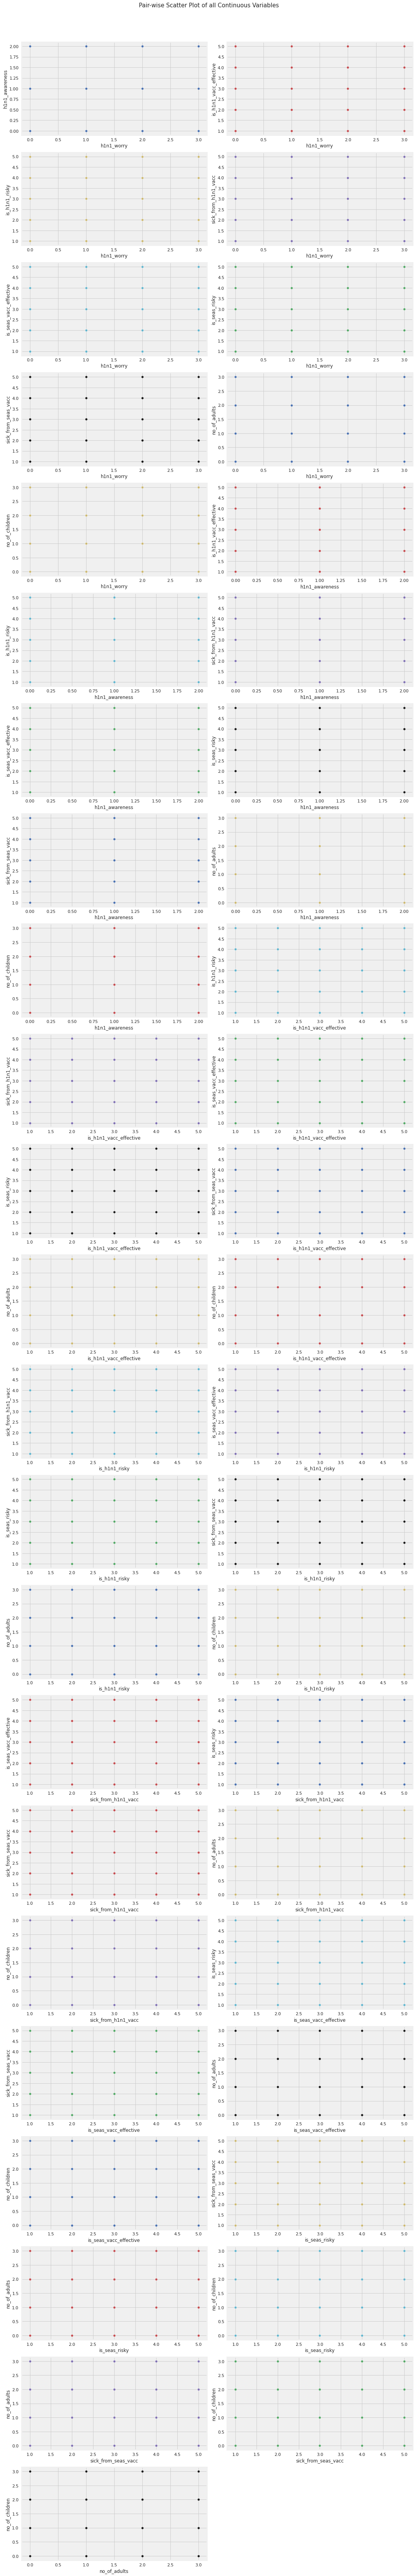

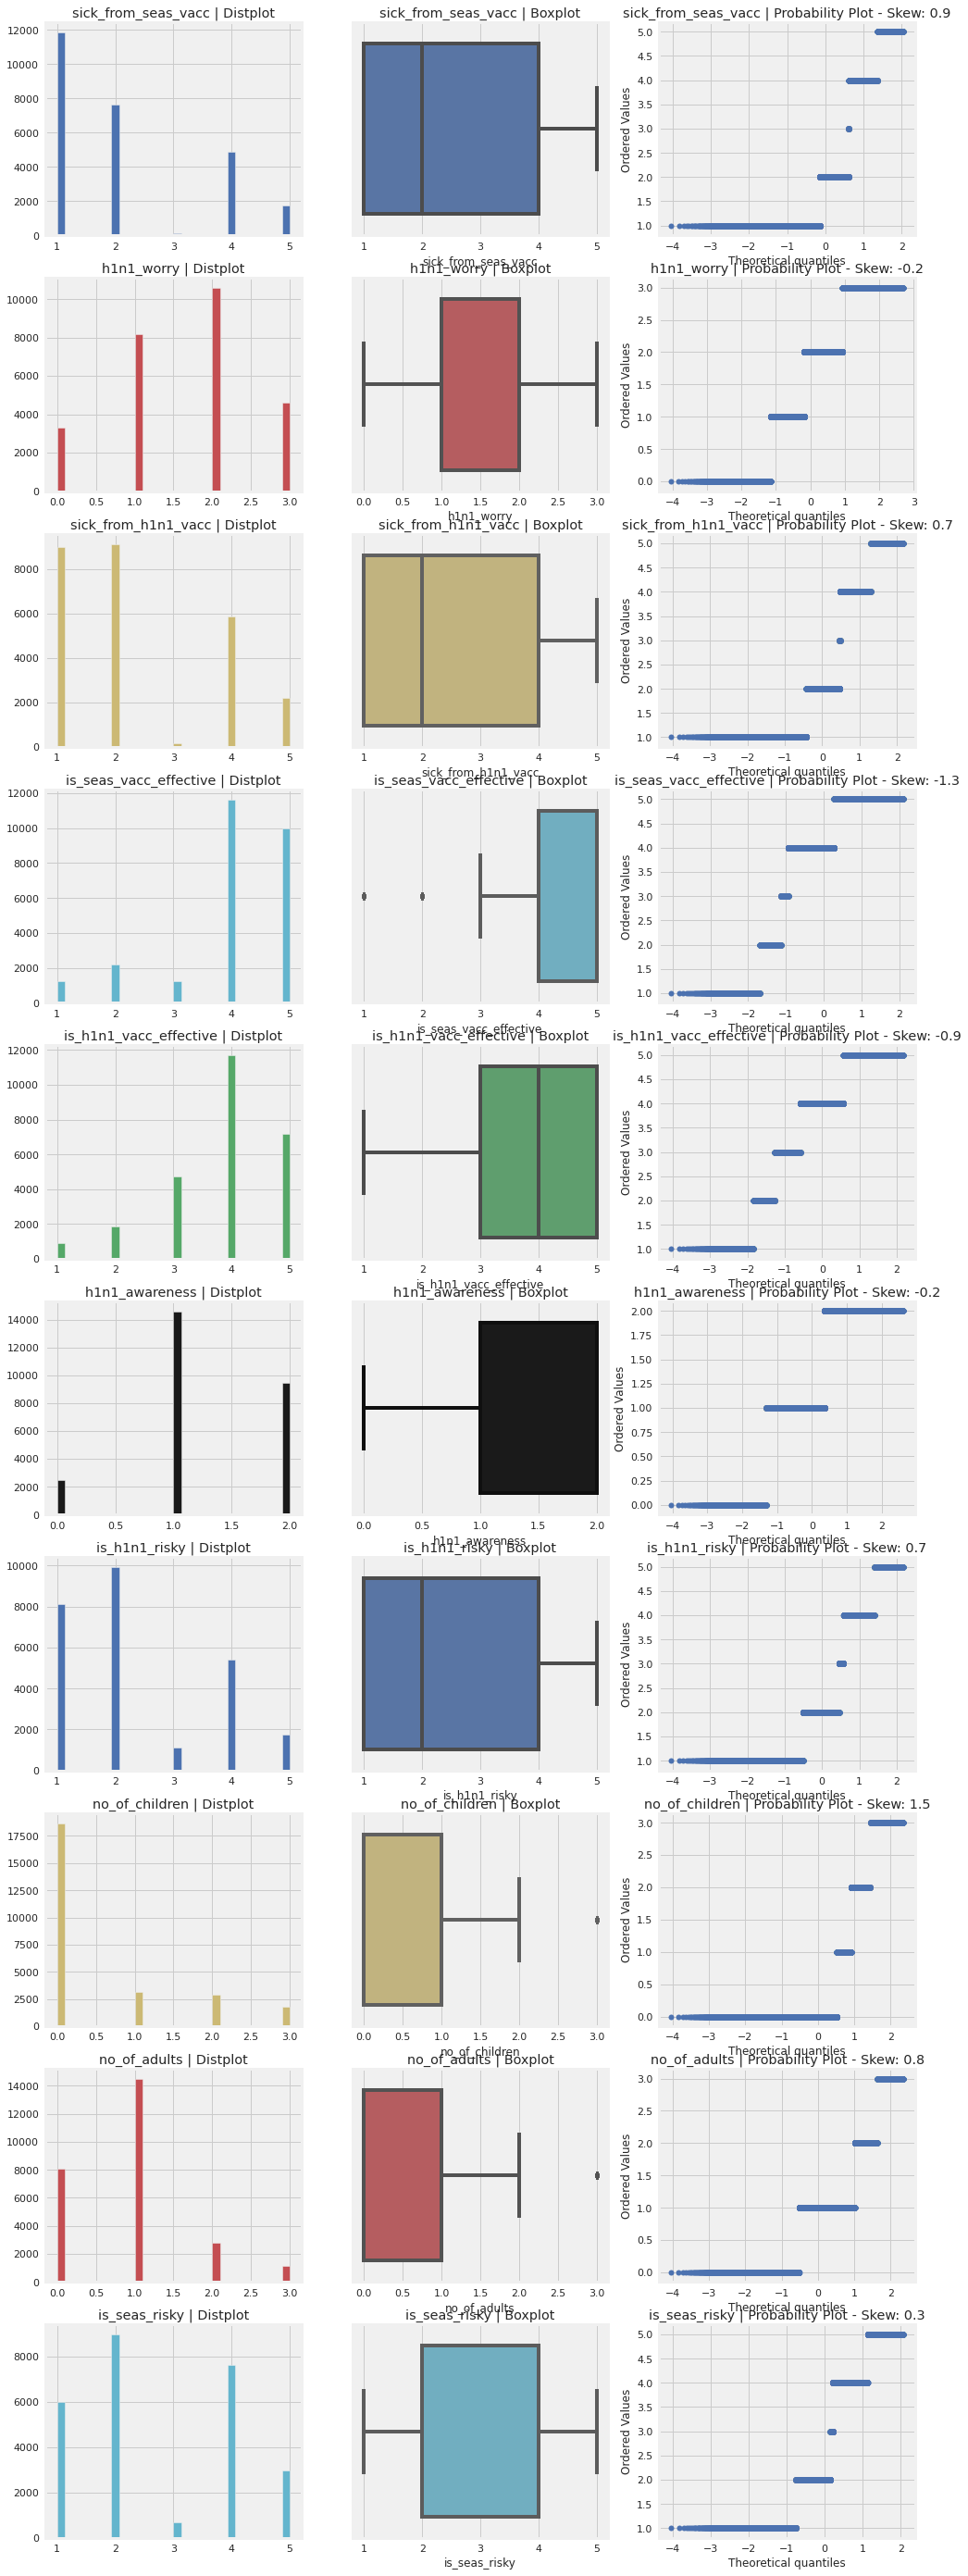

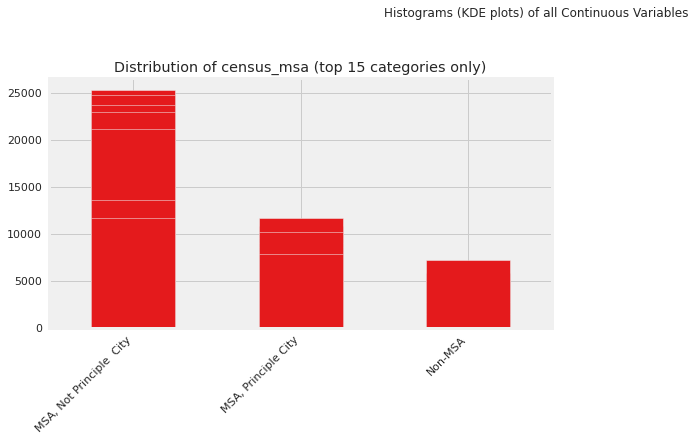

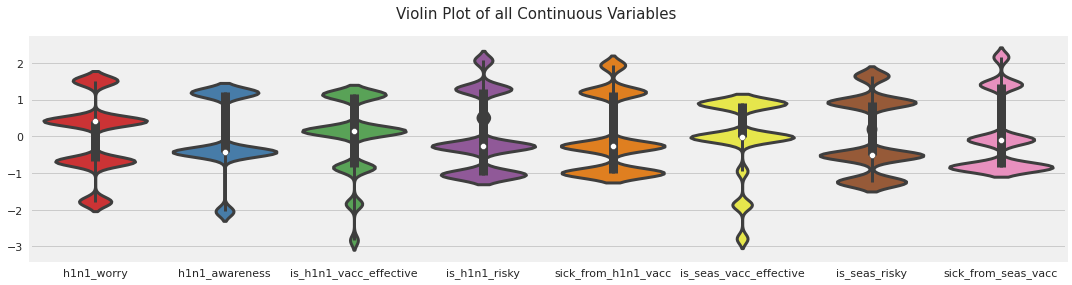

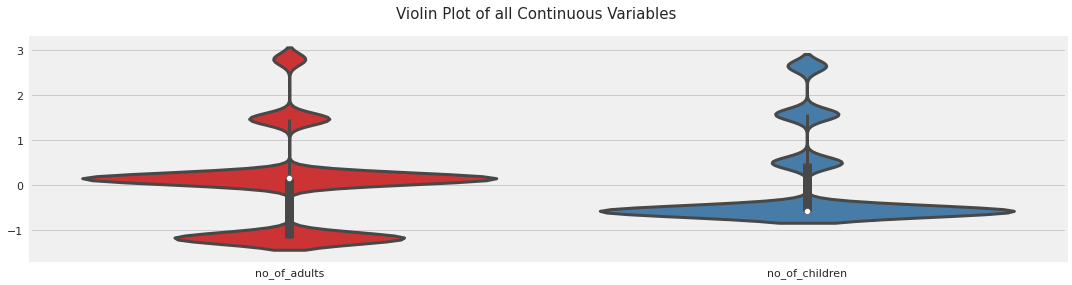

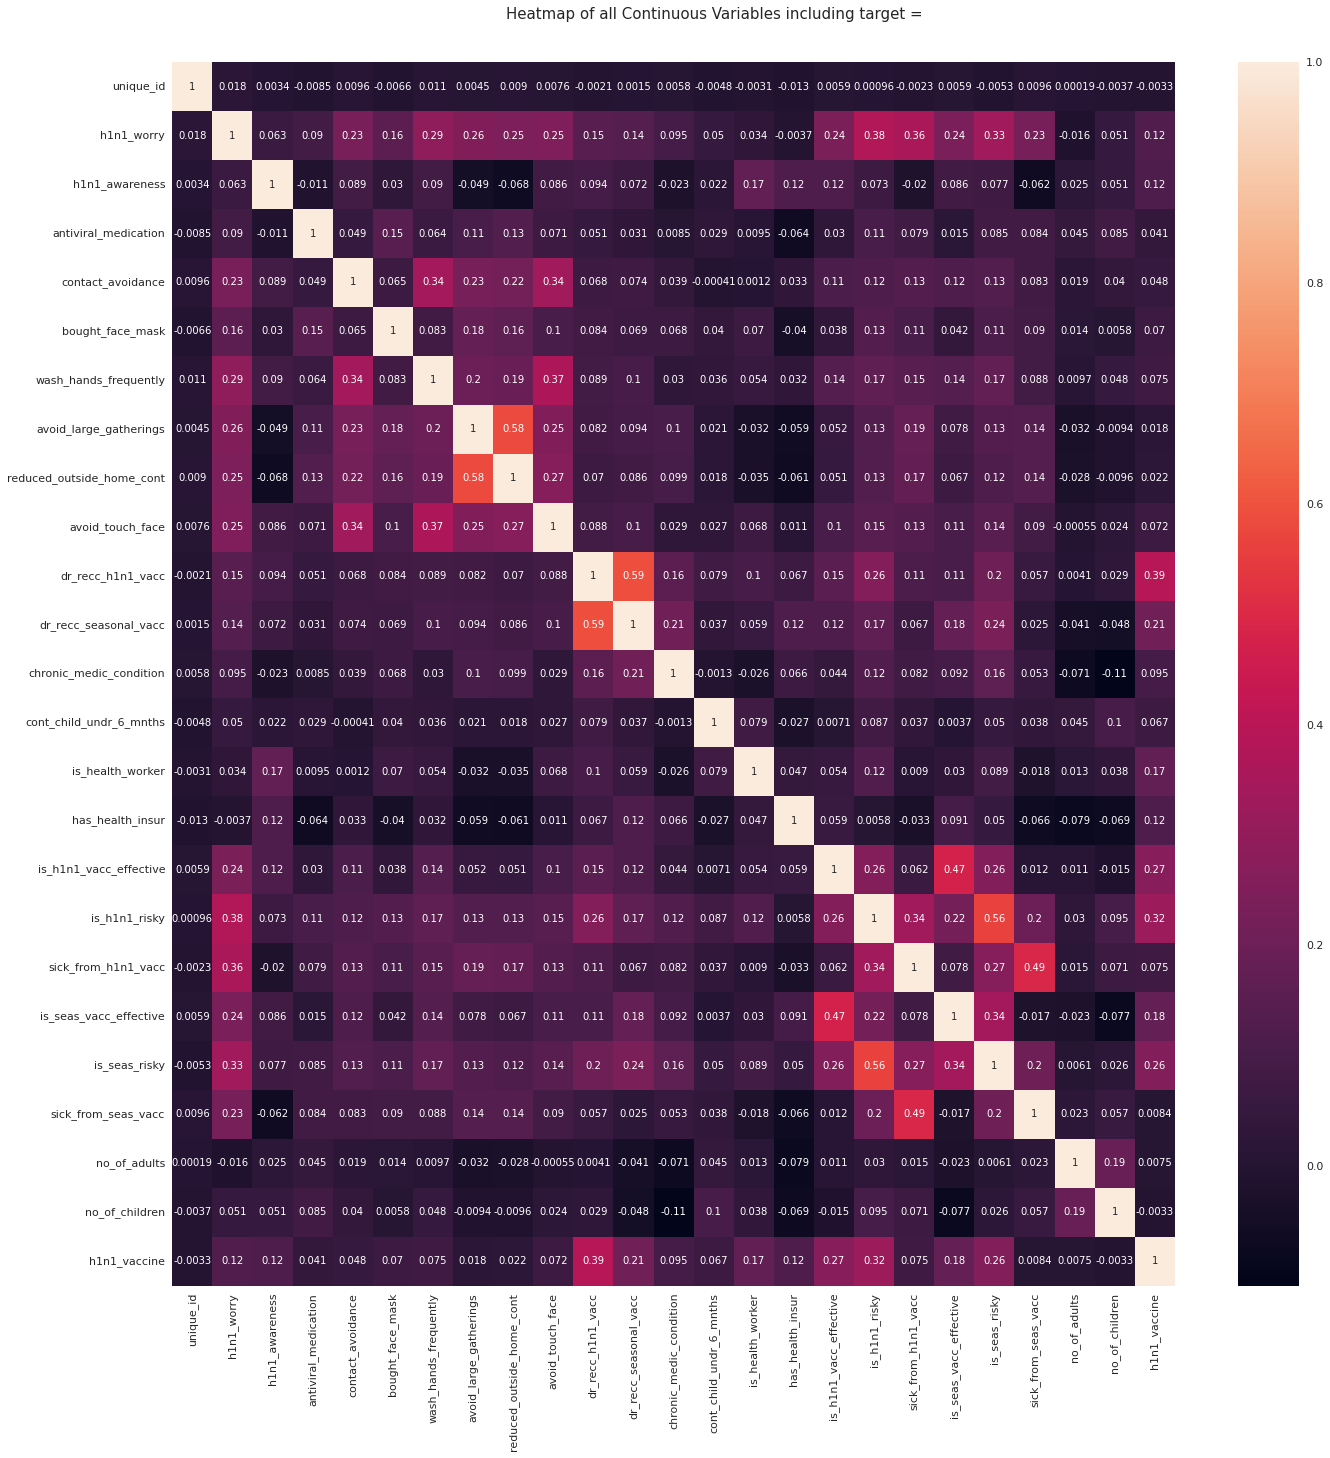

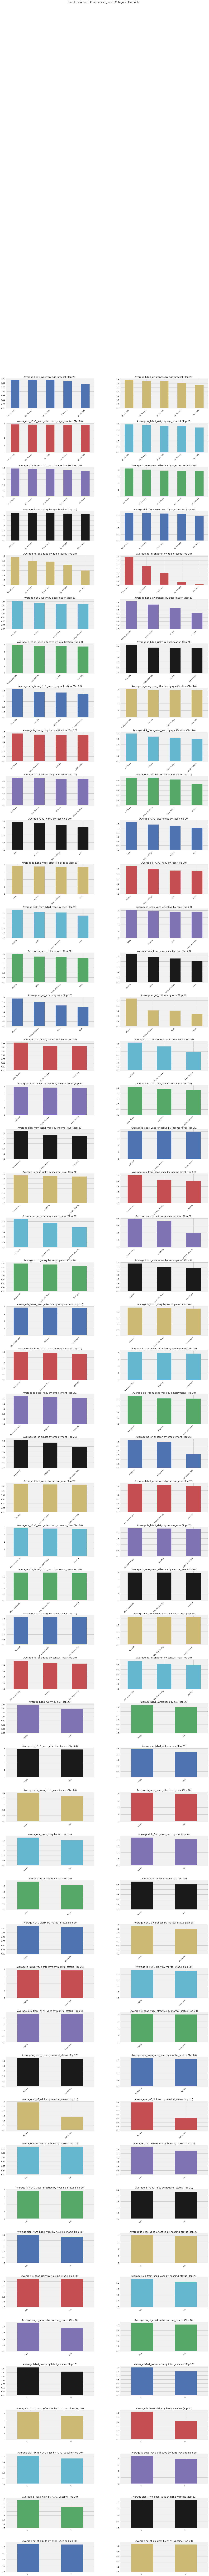

All Plots done
Time to run AutoViz = 58 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
filename = 'https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv'
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg"
)

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.1 MB/s eta 0:00:00


In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv"
df = pd.read_csv(url)

# Fill missing values with mean of column
df = df.fillna(df.mean())

# Select variables for linear regression
X = df[['dr_recc_h1n1_vacc']]
y = df['h1n1_vaccine']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set and calculate R-squared score
y_pred = model.predict(X_test)
r2_score = model.score(X_test, y_test)

print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)
print("R-squared score: ", r2_score)


Intercept:  0.12558044370272348
Coefficient:  [0.39315282]
R-squared score:  0.15453650558785692


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 15.0%
